<a href="https://colab.research.google.com/github/Dadoyen2/Artificial-Neural-network-for-the-Analysis-of-Portuguese-wines-Project/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# insert your code here
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import os,sys
from IPython.display import display
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve
import shap

fatal: destination path 'pyPhysChem' already exists and is not an empty directory.



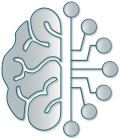

**Start at:** Sunday 05 January 2025, 17:48:15  
**Hostname:** 8495502ed7a5 (Linux)

<p style="text-align: center"><img width="800px" src="/content/pyPhysChem/configsvg/pyPhysChemBanner.svg" style="margin-left:auto; margin-right:auto"/></p>

Modules imported and initialized successfully!


In [5]:
!git clone https://github.com/rpoteau/pyPhysChem.git
import sys
sys.path.append('/content/pyPhysChem/config')
# Import the required modules
import visualID_Eng as vID
from visualID_Eng import color, fg, hl, bg
import tools4pyPhysChem as t4pPC

# Initialize visualID_Eng
vID.init('/content/pyPhysChem/config')

print("Modules imported and initialized successfully!")

In [8]:
# Paths to the files
file_path_red = '/content/winequality-red.csv'
file_path_white = '/content/winequality-white.csv'

# Load the data using pandas
data_red = pd.read_csv(file_path_red, sep=";", header=0)
data_white = pd.read_csv(file_path_white, sep=";", header=0)

# Change the last column of white wine data to 1
data_white.iloc[:, -1] = 1  # Update the last column (for white wine)

# Change the last column of red wine data to 0
data_red.iloc[:, -1] = 0  # Update the last column (for red wine)

# Add a column to indicate wine type (1 for white, 0 for red)
data_red['wine_type'] = 0  # Red wine type is 0
data_white['wine_type'] = 1  # White wine type is 1

# Combine the two DataFrames (concatenate them)
data_combined = pd.concat([data_red, data_white], ignore_index=True)

# Shuffle the combined DataFrame to mix red and white wines randomly
data_combined = data_combined.sample(frac=1, random_state=42).reset_index(drop=True)

# Print column names before removing 'quality' to check for any issues
#print("Column names before removing 'quality':", data_combined.columns)

# Remove the 'quality' column
data_combined.drop(columns=['quality'], inplace=True)


# Change the last column name to 'red_wine'
#data_combined.rename(columns={data_combined.columns[-1]: 'red_wine'}, inplace=True)

# Display the first 100 rows
# Display the first 100 rows of the combined data
display(data_combined)


# Display descriptive statistics with 2 decimal places
display(data_combined.describe().style.format("{0:.2f}"))

features = data_combined.columns[:-1]
Target=    data_combined.columns[-1]

#from google.colab import files

# Save the DataFrame as a CSV file in the Colab environment
#output_file = '/content/data_combined.csv'
#data_combined.to_csv(output_file, index=False)
# Download the CSV file to your local machine
#files.download(output_file)





,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_type
0,7.0,0.17,0.74,12.80,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,1
1,7.7,0.64,0.21,2.20,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,0
2,6.8,0.39,0.34,7.40,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,1
3,6.3,0.28,0.47,11.20,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,1
4,7.4,0.35,0.20,13.90,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,7.6,0.32,0.58,16.75,0.050,43.0,163.0,0.99990,3.15,0.54,9.2,1
6493,5.6,0.28,0.27,3.90,0.043,52.0,158.0,0.99202,3.35,0.44,10.7,1
6494,6.4,0.37,0.20,5.60,0.117,61.0,183.0,0.99459,3.24,0.43,9.5,1
6495,6.5,0.26,0.50,8.00,0.051,46.0,197.0,0.99536,3.18,0.47,9.5,1


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_type
count,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00
mean,7.22,0.34,0.32,5.44,0.06,30.53,115.74,0.99,3.22,0.53,10.49,0.75
std,1.30,0.16,0.15,4.76,0.04,17.75,56.52,0.00,0.16,0.15,1.19,0.43
min,3.80,0.08,0.00,0.60,0.01,1.00,6.00,0.99,2.72,0.22,8.00,0.00
25%,6.40,0.23,0.25,1.80,0.04,17.00,77.00,0.99,3.11,0.43,9.50,1.00
50%,7.00,0.29,0.31,3.00,0.05,29.00,118.00,0.99,3.21,0.51,10.30,1.00
75%,7.70,0.40,0.39,8.10,0.07,41.00,156.00,1.00,3.32,0.60,11.30,1.00
max,15.90,1.58,1.66,65.80,0.61,289.00,440.00,1.04,4.01,2.00,14.90,1.00


In [9]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
from google.colab import files

# Extract features and target variable
x = data_combined.iloc[:, :-1].values  # Extract all columns except the last (features)
y = data_combined.iloc[:, -1].values   # Extract the last column (target)

# Display original feature values (first 5 rows)
print("Original Feature Values (First 5 Rows):")
display(pd.DataFrame(x, columns=features).head())

# Standardize the feature values
scaler = StandardScaler()
x_standardized = scaler.fit_transform(x)  # Standardize only feature values

# Convert standardized values to a DataFrame (excluding the target)
standardized_features = pd.DataFrame(x_standardized, columns=features)  # Columns from features

# Display standardized features (first 5 rows)
print("Standardized Features (Excluding Target, First 5 Rows):")
display(standardized_features.head())

# Save the standardized features (without target) to a CSV file
output_file = '/content/standardized_features.csv'
standardized_features.to_csv(output_file, index=False)

# Download the file to your local machine
files.download(output_file)


Original Feature Values (First 5 Rows):


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9


Standardized Features (Excluding Target, First 5 Rows):


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.166089,-1.030629,2.899845,1.546371,-0.314975,-0.367664,0.181456,-0.165631,0.258120,-1.016626,1.432308
1,0.373895,1.824366,-0.747613,-0.681719,0.598504,0.083090,0.305311,0.301278,0.320319,-0.546178,-0.496219
2,-0.320370,0.305752,0.147046,0.411306,-1.028631,0.421155,0.305311,-0.859324,-0.239471,-0.613385,1.264610
3,-0.706073,-0.362438,1.041706,1.210056,-0.457706,1.717074,1.189993,0.408001,-0.612663,-0.142937,-0.831615
4,0.142473,0.062773,-0.816433,1.777588,-0.058059,1.829762,2.003900,1.395180,-0.674862,-0.210144,-1.334709


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.166089,-1.030629,2.899845,1.546371,-0.314975,-0.367664,0.181456,-0.165631,0.258120,-1.016626,1.432308
1,0.373895,1.824366,-0.747613,-0.681719,0.598504,0.083090,0.305311,0.301278,0.320319,-0.546178,-0.496219
2,-0.320370,0.305752,0.147046,0.411306,-1.028631,0.421155,0.305311,-0.859324,-0.239471,-0.613385,1.264610
3,-0.706073,-0.362438,1.041706,1.210056,-0.457706,1.717074,1.189993,0.408001,-0.612663,-0.142937,-0.831615
4,0.142473,0.062773,-0.816433,1.777588,-0.058059,1.829762,2.003900,1.395180,-0.674862,-0.210144,-1.334709


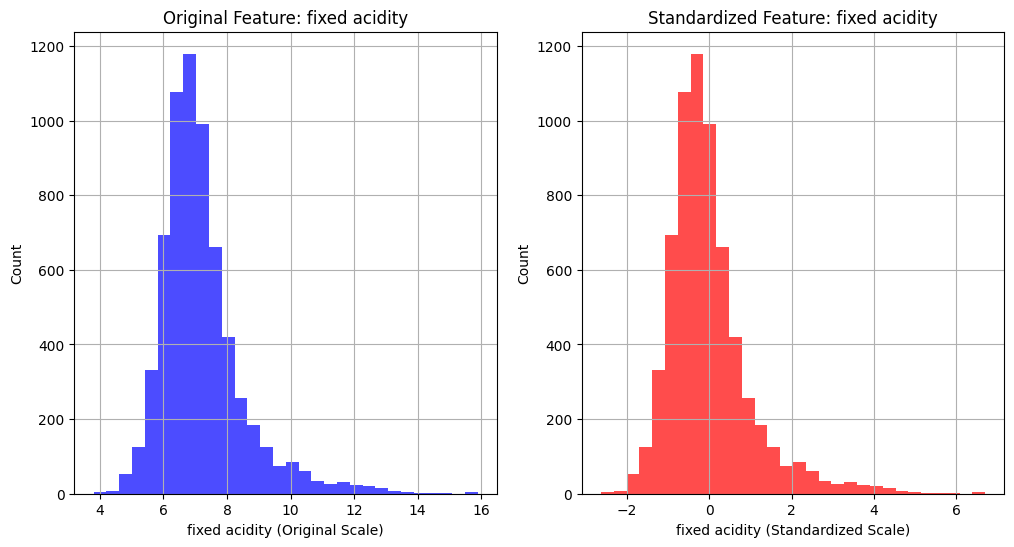

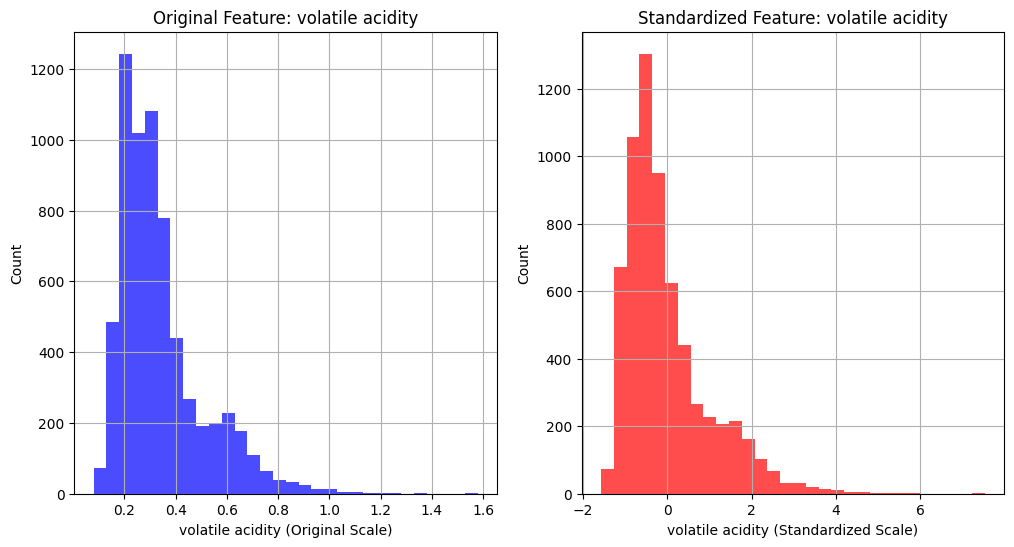

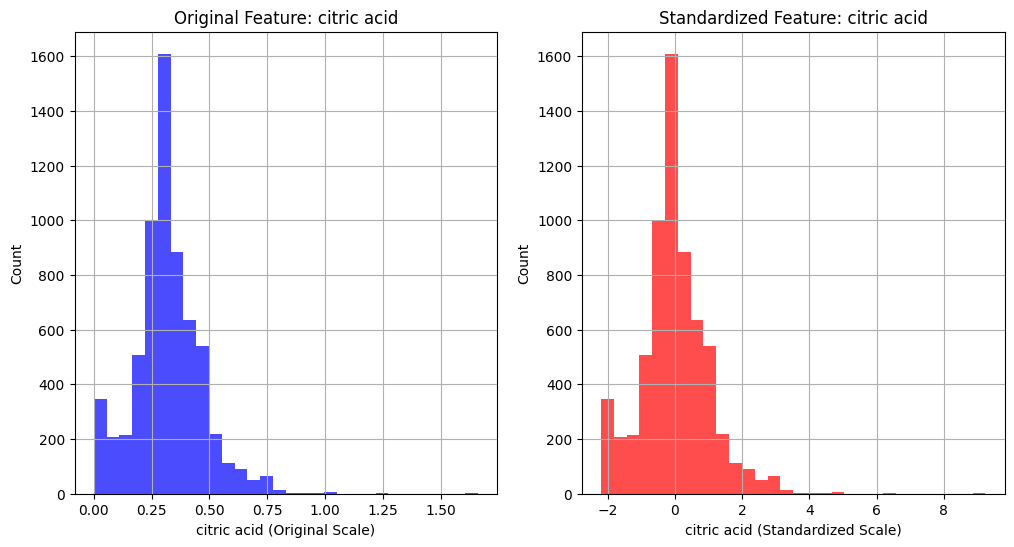

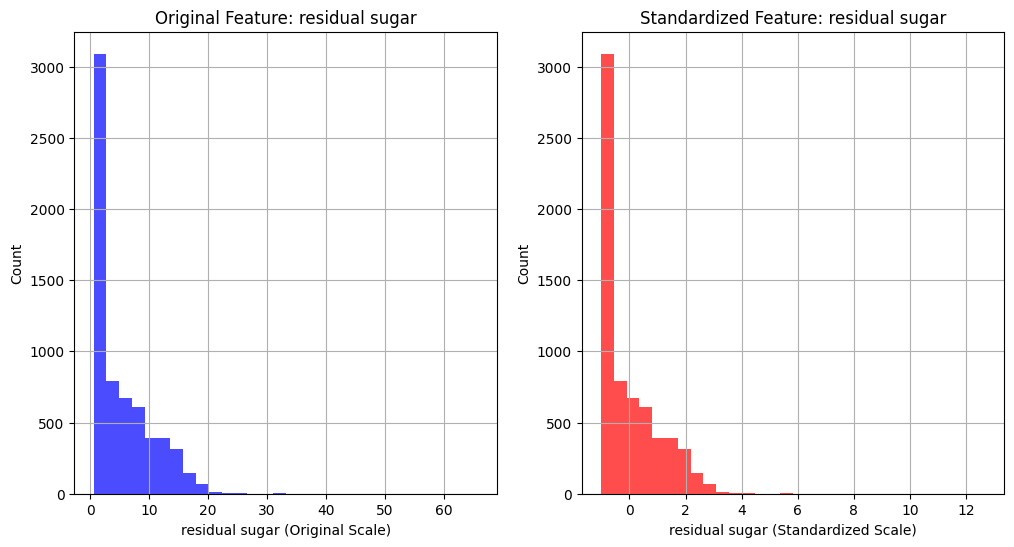

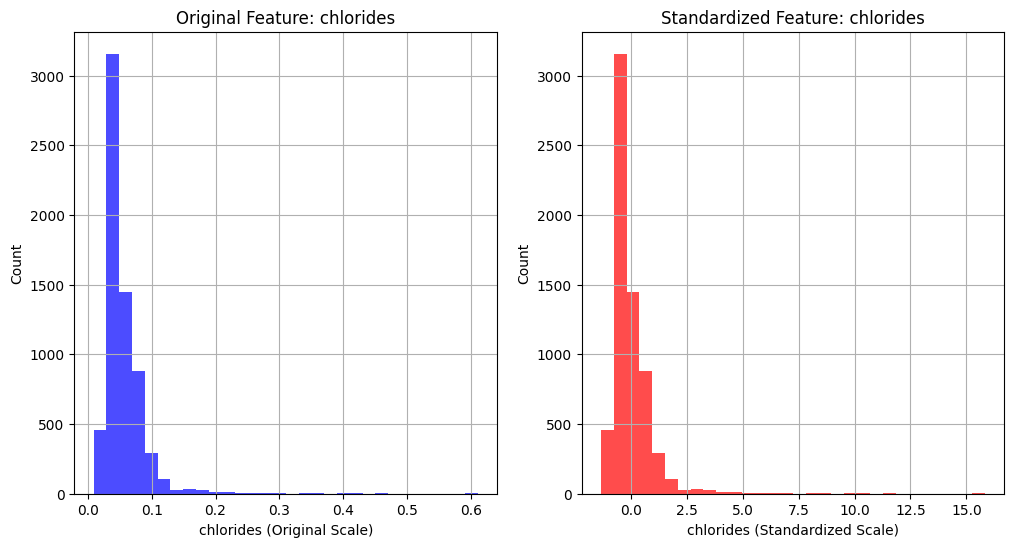

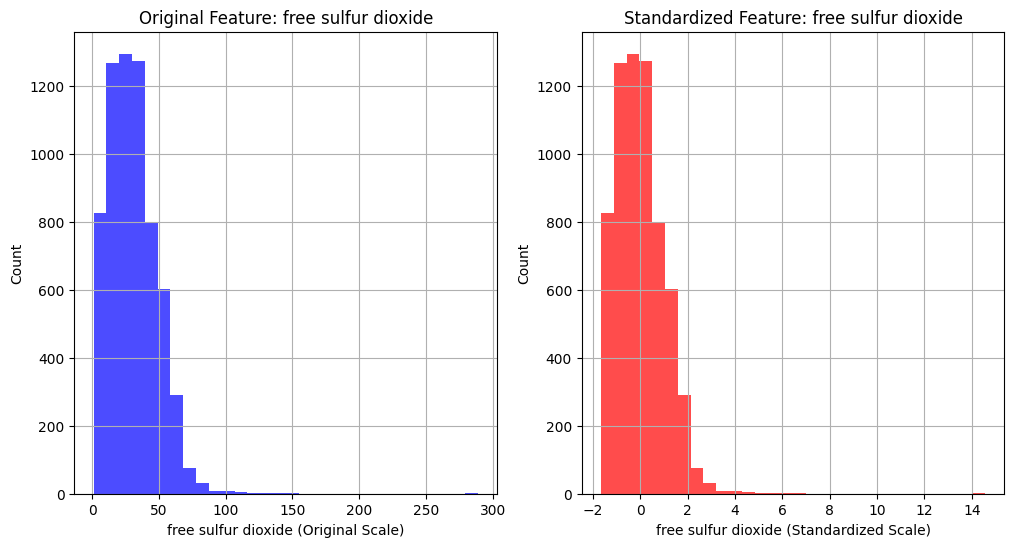

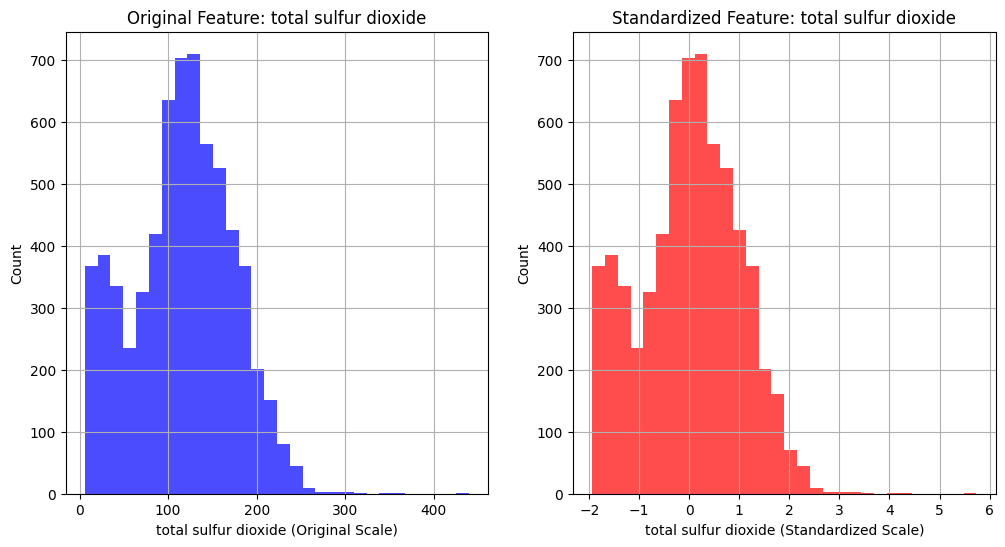

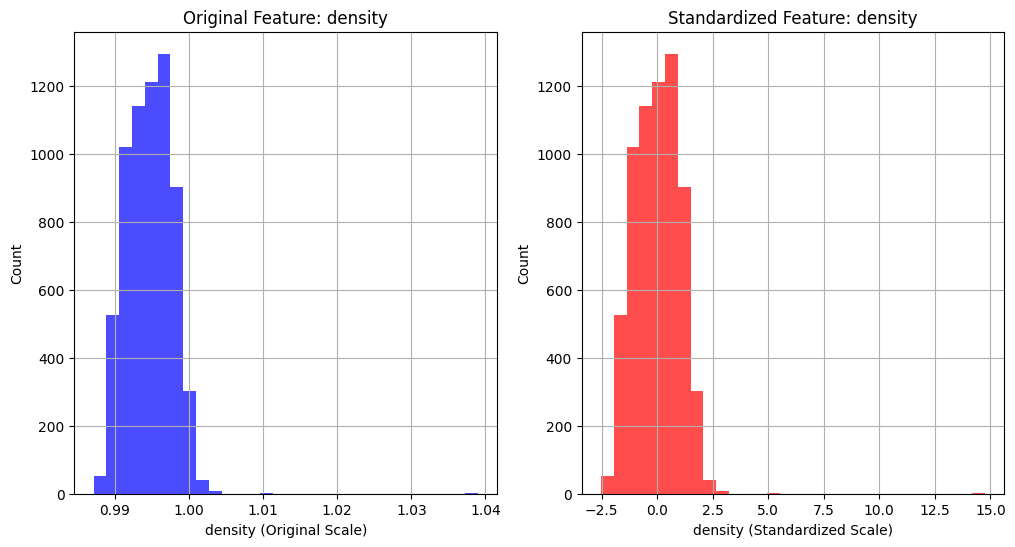

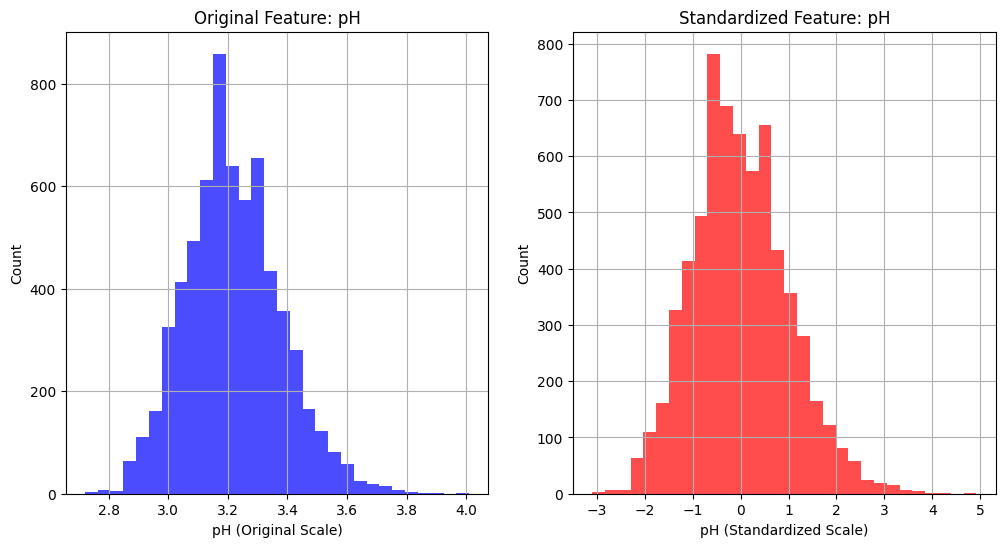

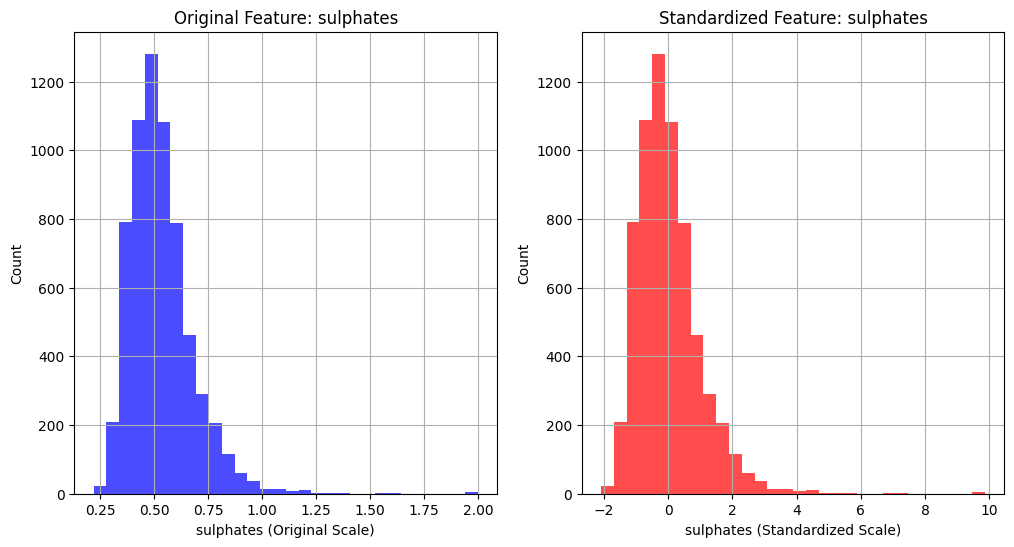

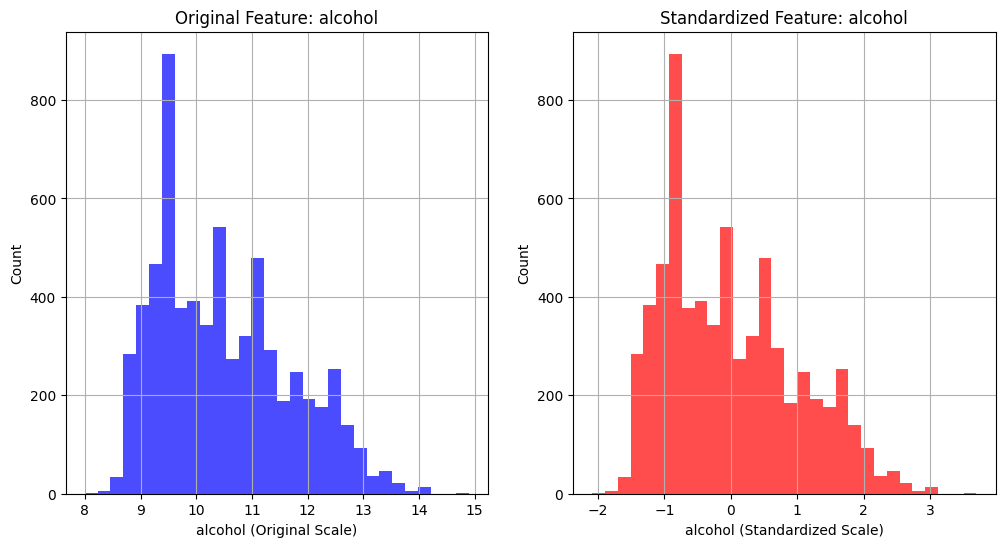

In [10]:
# Create a DataFrame for original features
original_features_df = pd.DataFrame(data=data_combined.loc[:, features].values, columns=features)
display(standardized_features.head())
# Loop through each feature to plot histograms
for feature in features:
    plt.figure(figsize=(12, 6))

    # Plot histogram for original feature values
    plt.subplot(1, 2, 1)
    plt.hist(original_features_df[feature], bins=30, color='blue', alpha=0.7)
    plt.title(f"Original Feature: {feature}")
    plt.xlabel(f"{feature} (Original Scale)")
    plt.ylabel("Count")
    plt.grid(True)

    # Plot histogram for standardized feature values
    plt.subplot(1, 2, 2)
    plt.hist(standardized_features[feature], bins=30, color='red', alpha=0.7)
    plt.title(f"Standardized Feature: {feature}")
    plt.xlabel(f"{feature} (Standardized Scale)")
    plt.ylabel("Count")
    plt.grid(True)

    #plt.tight_layout()
    #plt.show()


In [6]:
"""

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



# Apply PCA with 10 components
pca = PCA(n_components=11)
pca_features = pca.fit_transform(standardized_features)
# Explained variance ratio for PCA components
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.bar(range(1, 12), explained_variance_ratio, alpha=0.7, label='Explained Variance Ratio')
plt.step(range(1, 12), cumulative_variance, where='mid', label='Cumulative Variance', color='red')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Principal Components (PCA)')
plt.legend()
plt.grid(True)
plt.show()

# Print explained variance for interpretation
print("Explained Variance Ratio (10 Components):", explained_variance_ratio)
print("Cumulative Variance (10 Components):", cumulative_variance)"""


'\n\nfrom sklearn.decomposition import PCA\nimport matplotlib.pyplot as plt\nimport pandas as pd\nimport numpy as np\n\n\n\n# Apply PCA with 10 components\npca = PCA(n_components=11)\npca_features = pca.fit_transform(standardized_features)\n# Explained variance ratio for PCA components\nexplained_variance_ratio = pca.explained_variance_ratio_\ncumulative_variance = np.cumsum(explained_variance_ratio)\n\n# Plot explained variance ratio\nplt.figure(figsize=(10, 6))\nplt.bar(range(1, 12), explained_variance_ratio, alpha=0.7, label=\'Explained Variance Ratio\')\nplt.step(range(1, 12), cumulative_variance, where=\'mid\', label=\'Cumulative Variance\', color=\'red\')\nplt.xlabel(\'Principal Components\')\nplt.ylabel(\'Explained Variance\')\nplt.title(\'Explained Variance by Principal Components (PCA)\')\nplt.legend()\nplt.grid(True)\nplt.show()\n\n# Print explained variance for interpretation\nprint("Explained Variance Ratio (10 Components):", explained_variance_ratio)\nprint("Cumulative Var

In [11]:
display(standardized_features.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.166089,-1.030629,2.899845,1.546371,-0.314975,-0.367664,0.181456,-0.165631,0.258120,-1.016626,1.432308
1,0.373895,1.824366,-0.747613,-0.681719,0.598504,0.083090,0.305311,0.301278,0.320319,-0.546178,-0.496219
2,-0.320370,0.305752,0.147046,0.411306,-1.028631,0.421155,0.305311,-0.859324,-0.239471,-0.613385,1.264610
3,-0.706073,-0.362438,1.041706,1.210056,-0.457706,1.717074,1.189993,0.408001,-0.612663,-0.142937,-0.831615
4,0.142473,0.062773,-0.816433,1.777588,-0.058059,1.829762,2.003900,1.395180,-0.674862,-0.210144,-1.334709


In [12]:

# Assuming `pca_features` is the transformed data and `targets` contains the labels
# Replace `targets` with the actual target variable array or DataFrame
X = standardized_features
y = data_combined['wine_type'].values       # Target variable
#print(standardized_features.head())
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

#print(X_train)
#print(X_test)
#print(y_train)
#print(y_test)


X_train shape: (5197, 11)
X_test shape: (1300, 11)
y_train shape: (5197,)
y_test shape: (1300,)


In [22]:
print("Feature Means:", X_train.mean(axis=0))
print("Feature Std Devs:", X_train.std(axis=0))
print("Training Target Distribution:", np.bincount(y_train))
print("Test Target Distribution:", np.bincount(y_test))


Feature Means: fixed acidity           0.004557
volatile acidity        0.004957
citric acid             0.002732
residual sugar         -0.004396
chlorides               0.005603
free sulfur dioxide     0.003051
total sulfur dioxide   -0.005563
density                 0.001852
pH                     -0.002033
sulphates               0.008339
alcohol                 0.001554
dtype: float64
Feature Std Devs: fixed acidity           1.014565
volatile acidity        1.001898
citric acid             1.002136
residual sugar          0.995096
chlorides               0.998164
free sulfur dioxide     1.016973
total sulfur dioxide    1.000349
density                 1.001894
pH                      0.996859
sulphates               1.012170
alcohol                 1.000816
dtype: float64
Training Target Distribution: [1290 3907]
Test Target Distribution: [309 991]


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hLayer1 (Dense)                      │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hLayer2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hLayer3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ outputLayer (Dense)                  │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,801 (50.00 KB)

 Trainable params: 12,353 (48.25 KB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - AUC: 0.8948 - accuracy: 0.8095 - loss: 0.5314 - val_AUC: 0.9921 - val_accuracy: 0.9854 - val_loss: 0.2716 - learning_rate: 0.0010
Epoch 2/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9963 - accuracy: 0.9841 - loss: 0.2131 - val_AUC: 0.9938 - val_accuracy: 0.9923 - val_loss: 0.1787 - learning_rate: 0.0010
Epoch 3/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9976 - accuracy: 0.9848 - loss: 0.1823 - val_AUC: 0.9943 - val_accuracy: 0.9931 - val_loss: 0.1557 - learning_rate: 0.0010
Epoch 4/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.9969 - accuracy: 0.9873 - loss: 0.1648 - val_AUC: 0.9948 - val_accuracy: 0.9923 - val_loss: 0.1442 - learning_rate: 0.0010
Epoch 5/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.9988 - accuracy: 0.9910 - loss: 0.1365 - val_AUC: 0.9954 - val_accuracy: 0.9923 - val_loss: 0.1320 - learning_rate: 0.0010
Epoch 6/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.9987 - accura

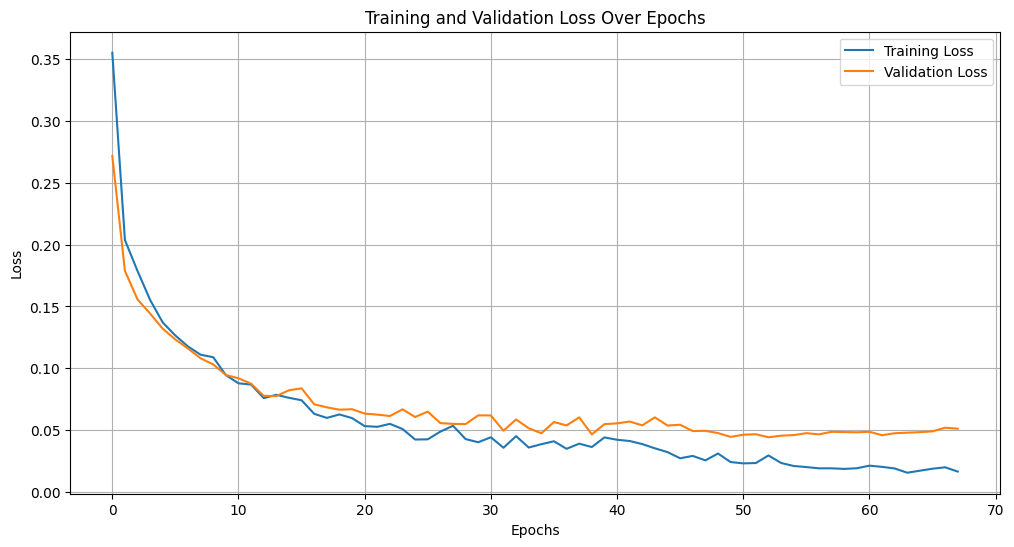

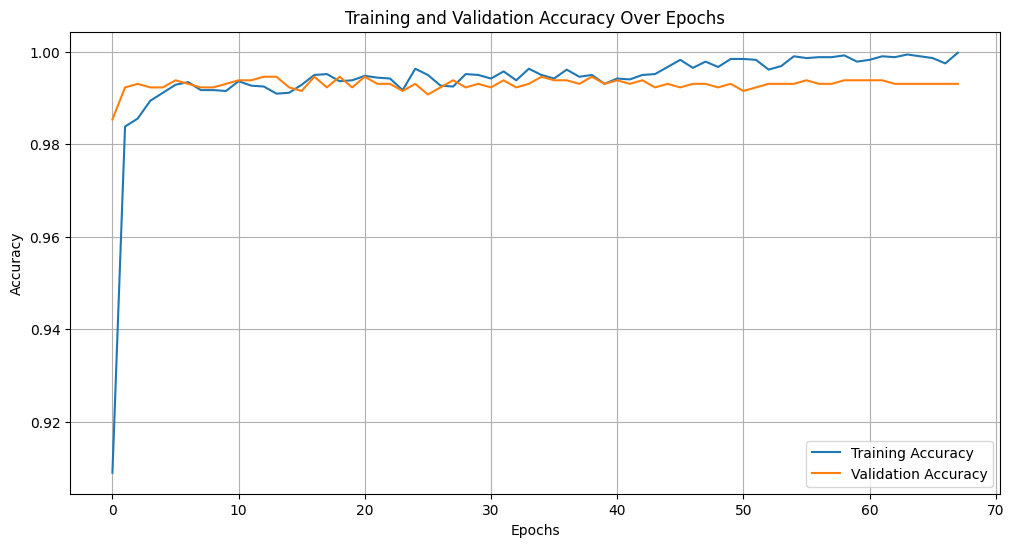

Model saved to /content/best_ANNmodel.h5
Training history saved to /content/best_ANNhistory.pkl


In [13]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import numpy as np
import joblib
import time

# Start timing
start_time = time.time()

# Define the model
def define_best_model(input_shape):
    model = Sequential([
        Dense(128, input_shape=input_shape, activation='relu', kernel_regularizer=l2(0.001), name='hLayer1'),
        BatchNormalization(),
        Dropout(0.2),
        Dense(64, activation='relu', kernel_regularizer=l2(0.001), name='hLayer2'),
        BatchNormalization(),
        Dropout(0.2),
        Dense(32, activation='relu', kernel_regularizer=l2(0.001), name='hLayer3'),
        BatchNormalization(),
        Dropout(0.2),
        Dense(1, activation='sigmoid', name='outputLayer')  # Sigmoid for binary classification
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy', 'AUC'])
    return model


def define_model(NE): #NE = nombre de neurones d'entrée

    model = keras.models.Sequential()
    model.add(keras.layers.Input(NE, name='iLayer'))
    model.add(keras.layers.Dense(7, activation='relu', name='hLayer1'))
    model.add(keras.layers.Dense(5, activation='relu', name='hLayer2'))
    model.add(keras.layers.Dense(3, activation='softmax', name='oLayer'))

    model.compile(optimizer = 'adam',
                  loss      = 'categorical_crossentropy',
                  metrics   = ['accuracy'] )
    return model

# Compute class weights for imbalance handling
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))

# Initialize the model
input_shape = (X_train.shape[1],)  # Ensure input shape matches the number of features
best_ANNmodel = define_best_model(input_shape)
best_ANNmodel.summary()

# Define early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=15, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

# Train the model
history = best_ANNmodel.fit(
    X_train,                # Use original training data
    y_train,                # Training labels
    epochs=100,             # Number of epochs
    batch_size=32,          # Batch size
    verbose=1,              # Verbose output
    validation_data=(X_test, y_test),  # Validation data
    callbacks=[early_stopping, reduce_lr],  # Apply callbacks
    class_weight=class_weights  # Class weights for imbalance handling
)

# Display elapsed time
end_time = time.time()
print(f"Training time: {end_time - start_time:.2f} seconds")

# Evaluate the model on training and test data
train_eval = best_ANNmodel.evaluate(X_train, y_train, verbose=0)
test_eval = best_ANNmodel.evaluate(X_test, y_test, verbose=0)
print(f"\nTraining Evaluation: Loss = {train_eval[0]:.4f}, Accuracy = {train_eval[1]:.4f}")
print(f"Test Evaluation: Loss = {test_eval[0]:.4f}, Accuracy = {test_eval[1]:.4f}")

# Predictions
ytrain_hat = best_ANNmodel.predict(X_train).flatten()
ytest_hat = best_ANNmodel.predict(X_test).flatten()

# Apply threshold for binary predictions
threshold = 0.3
ytrain_pred_binary = (ytrain_hat >= threshold).astype(int)
ytest_pred_binary = (ytest_hat >= threshold).astype(int)

# Classification Reports
print("\nClassification Report (Train):")
print(classification_report(y_train, ytrain_pred_binary, target_names=['Red', 'White']))

print("\nClassification Report (Test):")
print(classification_report(y_test, ytest_pred_binary, target_names=['Red', 'White']))

# AUC Scores
roc_auc_train = roc_auc_score(y_train, ytrain_hat)
roc_auc_test = roc_auc_score(y_test, ytest_hat)
print(f"\nAUC (Train): {roc_auc_train:.4f}")
print(f"AUC (Test): {roc_auc_test:.4f}")

# Plot training history (loss)
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot training history (accuracy)
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Save the model
model_path = '/content/best_ANNmodel.h5'
best_ANNmodel.save(model_path)
print(f"Model saved to {model_path}")

# Save the training history
history_path = '/content/best_ANNhistory.pkl'
joblib.dump(history.history, history_path)
print(f"Training history saved to {history_path}")


In [26]:

from sklearn.preprocessing import StandardScaler
import numpy as np

# Step 1: Refit the scaler (if not previously saved)
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)  # Fit scaler on training data

# Step 2: Preprocess External Data (ensure it has the same 11 features)
external_data = np.array([
    [7.0, 0.17, 0.74, 12.8, 0.045, 24.0,  126.0,  0.99420, 3.26, 0.38, 12.2],
    [7.7, 0.64, 0.21, 2.2,  0.077, 32.0,  133.0,  0.99560, 3.27, 0.45, 9.9],
    [7.4, 0.7,  0.00, 1.9,  0.076, 11,    34,     0.9978, 3.51,  0.56, 9.4],
    [6.8, 0.39, 0.34, 7.4,  0.020, 38.0,  133.0,  0.99212, 3.18, 0.44, 12.0],
    [6.3, 0.28, 0.47, 11.2, 0.040, 61.0,  183.0,  0.99592, 3.12, 0.51, 9.5],
    [7.4, 0.35, 0.20, 13.9, 0.054, 63.0,  229.0,  0.99888, 3.11, 0.50, 8.9],
    [7.2, 0.62, 0.06, 2.70, 0.077, 15.0,  85.0,   0.99746, 3.51, 0.54, 9.5],
    [7.6, 0.32, 0.58, 16.75,0.050, 43.0,  163.0,  0.99990, 3.15, 0.54, 9.2],
    [5.6, 0.28, 0.27, 3.90, 0.043, 52.0,  158.0,  0.99202, 3.35, 0.44, 10.7],
    [6.4, 0.37, 0.20, 5.60, 0.117, 61.0,  183.0,  0.99459, 3.24, 0.43, 9.5],
    [6.5, 0.26, 0.50, 8.00, 0.051, 46.0,  197.0,  0.99536, 3.18, 0.47, 9.5],
    [7.2, 0.62, 0.06, 2.70, 0.077, 15.0,  85.0,   0.99746, 3.51, 0.54, 9.5],
    [7.5, 0.24, 0.49, 9.4,  0.048, 50.0,  149.0,  0.99620, 3.17, 0.59, 10.5],
    [5.0, 0.74, 0.00, 1.2,  0.041, 16.0,  46.0,   0.99258, 4.01, 0.59, 12.5],
    [7.4, 0.28, 0.30, 5.3,  0.054, 44.0,  161.0,  0.99410, 3.12, 0.48, 10.3],
    [6.6, 0.56, 0.16, 3.1,  0.045, 28.0,  92.0,   0.99400, 3.12, 0.35, 9.1],
    [5.6, 0.50, 0.09, 2.3,  0.049, 17.0,  99.0,   0.99370, 3.63, 0.63, 13.0],
    [7.8, 0.88, 0.00, 2.6,  0.098, 25.0,  67.0,   0.9968,  3.2,  0.68, 9.8],
    [10,  0.1,  0.3,  3.6,  0.2,   13,    150,    0.955,   3.3,  0.6,  10],
    [7.6, 0.74, 0.22, 2.3,  0.079, 33.0,  134.0,  0.99570, 3.37, 0.55, 9.7],
    [7.2, 0.17, 0.84, 12.9, 0.145, 28.0,  126.0,  0.99990, 4.26, 0.55, 12.2]

])

# Standardize the external data using the same scaler as training
external_data_scaled = scaler.transform(external_data)

# Step 3: Predict using the trained ANN model
external_predictions = best_ANNmodel.predict(external_data_scaled)

# Step 4: Flatten predictions (if needed)
external_predictions = external_predictions.flatten()

# Step 5: Map predictions to "Red Wine" or "White Wine"
def map_predictions(predictions, threshold=0.1):
    return ["Red Wine" if pred < threshold else "White Wine" for pred in predictions]

mapped_predictions = map_predictions(external_predictions)

# Step 6: Display predictions alongside the input data
print("Predictions on External Data:")
print(f"{'Input Data':<80} {'Predicted Probability':<25} {'Predicted Class'}")
for i, (row, prob, pred_class) in enumerate(zip(external_data, external_predictions, mapped_predictions)):
    input_data_str = ", ".join([f"{x:.2f}" for x in row])
    print(f"{input_data_str:<80} {prob:<25.4f} {pred_class}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Predictions on External Data:
Input Data                                                                       Predicted Probability     Predicted Class
7.00, 0.17, 0.74, 12.80, 0.04, 24.00, 126.00, 0.99, 3.26, 0.38, 12.20            0.9994                    White Wine
7.70, 0.64, 0.21, 2.20, 0.08, 32.00, 133.00, 1.00, 3.27, 0.45, 9.90              0.0010                    Red Wine
7.40, 0.70, 0.00, 1.90, 0.08, 11.00, 34.00, 1.00, 3.51, 0.56, 9.40               0.0000                    Red Wine
6.80, 0.39, 0.34, 7.40, 0.02, 38.00, 133.00, 0.99, 3.18, 0.44, 12.00             0.9994                    White Wine
6.30, 0.28, 0.47, 11.20, 0.04, 61.00, 183.00, 1.00, 3.12, 0.51, 9.50             1.0000                    White Wine
7.40, 0.35, 0.20, 13.90, 0.05, 63.00, 229.00, 1.00, 3.11, 0.50, 8.90             1.0000                    White Wine
7.20, 0.62, 0.06, 2.70, 0.08, 15.00, 85.00, 1.00, 3.51, 0.54, 9.50               0.0002                  

In [30]:
print(data_combined.shape)
print(data_combined.columns)

(6497, 12)
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'wine_type'],
      dtype='object')


In [32]:
import shap

# Initialize SHAP explainer
explainer = shap.KernelExplainer(best_ANNmodel, X_train[:100])  # Pass a subset of training data for efficiency

# Compute SHAP values for test set
shap_values = explainer.shap_values(X_test)

# Visualize the contribution of features for a single prediction
shap.force_plot(explainer.expected_value[0], shap_values[0][0], X_test[0], feature_names=data_combined.columns[:-1])

# Summary plot to see global feature importance
shap.summary_plot(shap_values[0], X_test, feature_names=data_combined.columns[:-1])


  0%|          | 0/1300 [00:00<?, ?it/s]

KeyError: 0

In [27]:
# select a set of background examples to take an expectation over
background = X_train.copy()
print(background.shape,type(background))
dummy = background.to_numpy()
dummy = np.array(dummy)
print(dummy.shape,type(dummy))
print(type(best_ANNmodel))
print(best_ANNmodel.layers[0].input)
# dummy = background.to_numpy()
# print(dummy.shape)
# print(type(dummy.shape))
# print(np.array(dummy.shape))
# print(np.array(dummy.shape).as_list())
# deep_explainer = shap.DeepExplainer(IrisANNmodel, dummy)
deep_explainer = shap.DeepExplainer((best_ANNmodel.layers[0].input,best_ANNmodel.layers[-1].input), background)
shap_values_train = deep_explainer.shap_values(X_train.values)

print(deep_explainer.expected_value)

(5197, 11) <class 'pandas.core.frame.DataFrame'>
(5197, 11) <class 'numpy.ndarray'>
<class 'keras.src.models.sequential.Sequential'>
<KerasTensor shape=(None, 11), dtype=float32, sparse=False, name=keras_tensor>


/usr/local/lib/python3.10/dist-packages/shap/explainers/_deep/deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")
/usr/local/lib/python3.10/dist-packages/shap/explainers/_deep/deep_tf.py:155: UserWarning: You have provided over 5k background samples! For better performance consider using smaller random sample.
  warnings.warn("You have provided over 5k background samples! For better performance consider using smaller random sample.")


KeyboardInterrupt: 

Class Weights: {0: 2.014341085271318, 1: 0.6650883030458152}


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hLayer1 (Dense)                      │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hLayer2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hLayer3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ outputLayer (Dense)                  │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,801 (50.00 KB)

 Trainable params: 12,353 (48.25 KB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8219 - loss: 1.6754 - val_accuracy: 0.9885 - val_loss: 1.0491 - learning_rate: 0.0010
Epoch 2/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9771 - loss: 0.8534 - val_accuracy: 0.9923 - val_loss: 0.5658 - learning_rate: 0.0010
Epoch 3/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9868 - loss: 0.5006 - val_accuracy: 0.9938 - val_loss: 0.3344 - learning_rate: 0.0010
Epoch 4/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9908 - loss: 0.3081 - val_accuracy: 0.9931 - val_loss: 0.2199 - learning_rate: 0.0010
Epoch 5/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9873 - loss: 0.2170 - val_accuracy: 0.9938 - val_loss: 0.1605 - learning_rate: 0.0010
Epoch 6/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9931 - loss: 0.1466 - val_accuracy: 0.9946 - val_loss: 0.1251 - learning_rate: 0.0010
Epoch 7/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9898 - loss: 0.

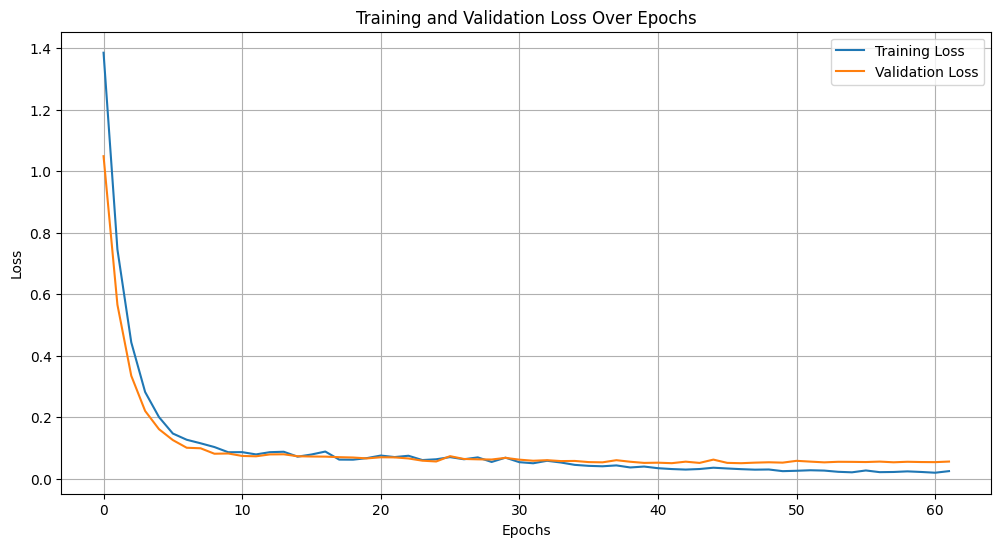

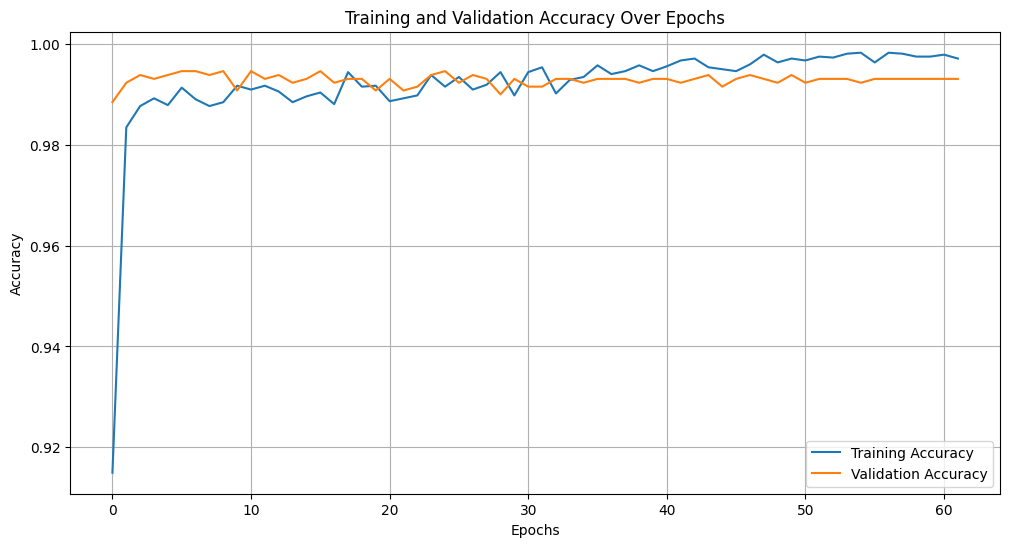

Model saved to /content/best_ANNmodel.h5
Training history saved to /content/best_ANNhistory.pkl



Sample Training Predictions (First 10):
[9.9942642e-01 9.9884540e-01 9.9996817e-01 9.9945790e-01 7.0094662e-05
 9.9704152e-01 9.9855244e-01 2.2767666e-05 6.0735671e-05 9.9954945e-01]

Sample Test Predictions (First 10):
[9.9722195e-01 9.9946940e-01 9.9986148e-01 9.9747592e-01 3.3215614e-04
 9.9947208e-01 9.9975431e-01 9.9849671e-01 9.6841663e-01 9.9570227e-01]


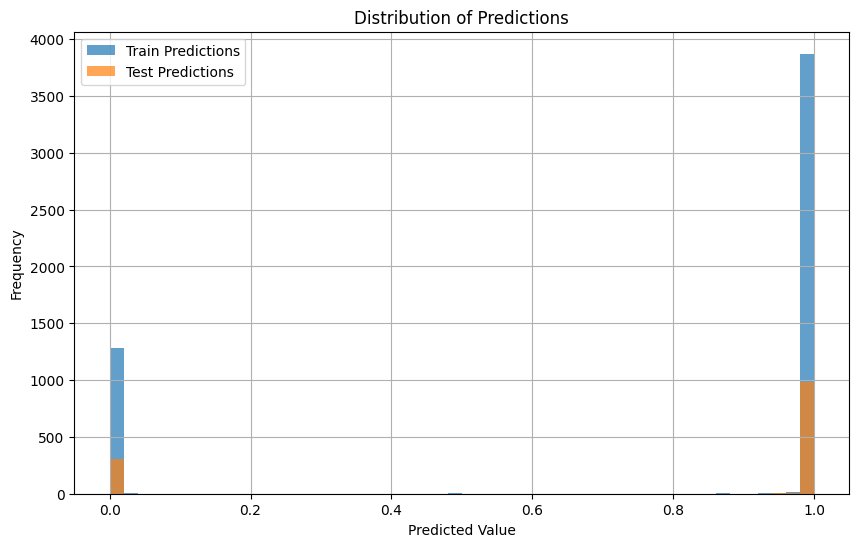

Training Predictions - Min: 3.0769592e-11 Max: 1.0
Test Predictions - Min: 3.7616354e-07 Max: 0.9999987

Training Target Class Balance:
{0: 1290, 1: 3907}

Test Target Class Balance:
{0: 309, 1: 991}

Sample Scaled Features (First 5 Rows of X_train):
[[-0.01613135 -1.03372345  0.14402025  0.20653816 -0.4070027  -0.80783737
  -0.07836567 -0.63991147 -1.42382352 -0.87992908  0.2566832 ]
 [-0.39633376 -0.66991141 -1.02353759 -0.87085447  0.13642521 -0.91865586
  -0.27294642 -0.73312577 -0.92461717  0.11614834 -0.83256944]
 [ 0.51615202 -1.09435879 -0.13069924 -0.13146737 -0.55001005  0.35575678
   0.9829839   0.66508874  1.57141454 -0.61430843 -1.25151277]
 [ 0.13594961 -0.79118209 -0.33673886 -0.89197981 -0.43560417 -0.19833567
  -0.29063558 -0.66654413 -0.17580766 -1.34476521 -0.58120345]
 [ 2.03696166  1.20978411 -0.40541873 -0.72297705  1.56649866 -1.30652057
  -0.9805128   0.79492294 -1.73582748  2.97157027 -0.24604879]]


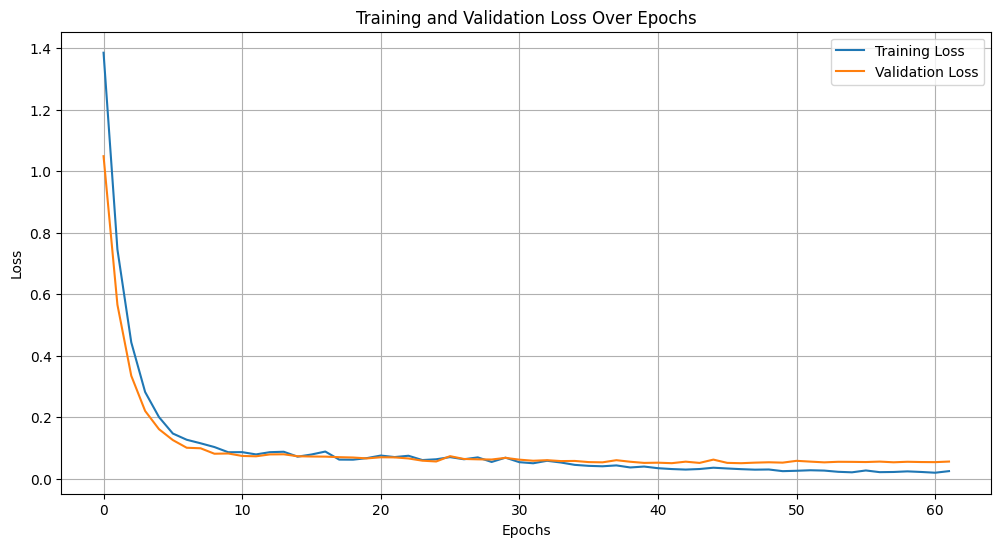

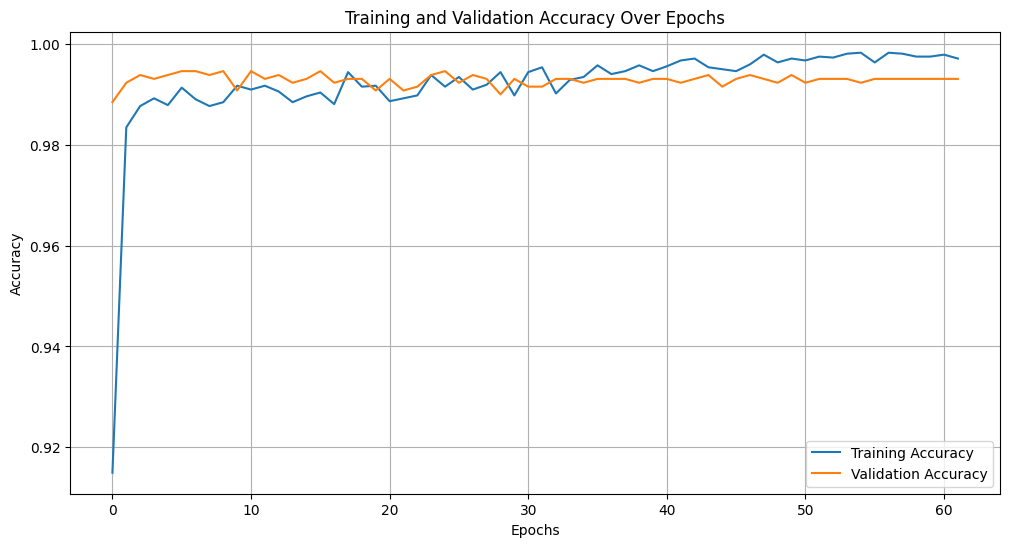


Optimal Threshold: 0.6059

Classification Report (Training) with Optimal Threshold:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1290
           1       1.00      1.00      1.00      3907

    accuracy                           1.00      5197
   macro avg       1.00      1.00      1.00      5197
weighted avg       1.00      1.00      1.00      5197


Classification Report (Test) with Optimal Threshold:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       309
           1       0.99      1.00      1.00       991

    accuracy                           0.99      1300
   macro avg       0.99      0.99      0.99      1300
weighted avg       0.99      0.99      0.99      1300



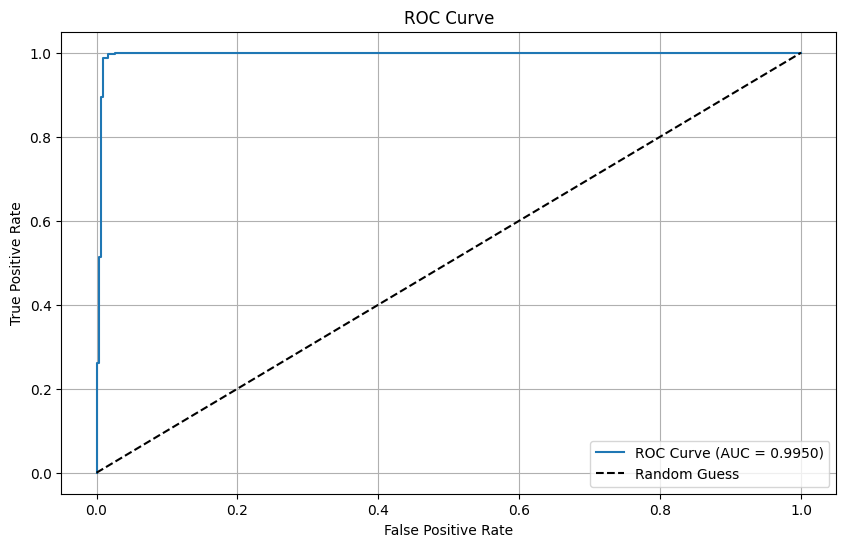

Diagnostic data saved to /content/diagnostic_data.pkl


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predictions on External Data:
Input Data                                                                       Predicted Probability     Predicted Class
7.00, 0.17, 0.74, 12.80, 0.04, 24.00, 126.00, 0.99, 3.26, 0.38, 12.20            0.0000                    Red Wine
7.70, 0.64, 0.21, 2.20, 0.08, 32.00, 133.00, 1.00, 3.27, 0.45, 9.90              0.0000                    Red Wine
6.80, 0.39, 0.34, 7.40, 0.02, 38.00, 133.00, 0.99, 3.18, 0.44, 12.00             0.0000                    Red Wine
6.30, 0.28, 0.47, 11.20, 0.04, 61.00, 183.00, 1.00, 3.12, 0.51, 9.50             0.0000                    Red Wine
7.40, 0.35, 0.20, 13.90, 0.05, 63.00, 229.00, 1.00, 3.11, 0.50, 8.90             0.0000                    Red Wine
7.20, 0.62, 0.06, 2.70, 0.08, 15.00, 85.00, 1.00, 3.51, 0.54, 9.50               0.0000                    Red Wine
7.60, 0.32, 0.58, 16.75, 0.05, 43.00, 163.00, 1.00, 3.15, 0.54, 9.20             0.0000                    Red Wi

'\n# Define acceptable ranges for the principal components\npc1_min, pc1_max = -7.5, 7.5  # Example range for Principal Component 1\npc2_min, pc2_max = -7.5, 7.5  # Example range for Principal Component 2\n\n# Filter the DataFrame to retain only rows within the range\nfiltered_df = final_df[\n    (final_df[\'Principal Component 1\'] >= pc1_min) &\n    (final_df[\'Principal Component 1\'] <= pc1_max) &\n    (final_df[\'Principal Component 2\'] >= pc2_min) &\n    (final_df[\'Principal Component 2\'] <= pc2_max)\n]\n\n# Display the first few rows of the filtered data\nprint("Filtered PCA Data (First 5 Rows):")\ndisplay(filtered_df.head())\n\n# Plotting the filtered PCA data\nplt.figure(figsize=(8, 6))\nplt.scatter(filtered_df[\'Principal Component 1\'], filtered_df[\'Principal Component 2\'],\n            c=filtered_df[\'wine_type\'], cmap=\'coolwarm\', alpha=0.7)\nplt.colorbar(label=\'Wine Type (0 = Red, 1 = White)\')\nplt.xlabel(\'Principal Component 1\')\nplt.ylabel(\'Principal Compone

'\n# Split the standardized data into training (80%) and test (20%) sets\ntrain_data, test_data = train_test_split(standardized_features, test_size=0.2, random_state=42)\n\n# Display the shapes of the resulting sets\nprint(f"Training Data Shape: {train_data.shape}")\nprint(f"Test Data Shape: {test_data.shape}")\n\n# Display the first few rows of each set\nprint("\nTraining Data (First 5 Rows):")\ndisplay(train_data.head())\n\nprint("\nTest Data (First 5 Rows):")\ndisplay(test_data.head())\n'

'\nfrom sklearn.model_selection import train_test_split\n\n# Assuming `standardized_features` is your DataFrame with the last column as the target variable\n# Split into features (X) and target (y)\nX = standardized_features.iloc[:, :-1]  # All columns except the last (features)\ny = standardized_features.iloc[:, -1]  # The last column (target variable)\n\n# Split the data into training (80%) and test (20%) sets\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# Display the shapes of the resulting datasets\nprint(f"X_train shape: {X_train.shape}")\nprint(f"X_test shape: {X_test.shape}")\nprint(f"y_train shape: {y_train.shape}")\nprint(f"y_test shape: {y_test.shape}")\n\n# Optional: Display the first few rows of each dataset\nprint("\nX_train (First 5 Rows):")\ndisplay(X_train.head())\n\nprint("\nX_test (First 5 Rows):")\ndisplay(X_test.head())\n\nprint("\ny_train (First 5 Rows):")\ndisplay(y_train.head())\n\nprint("\ny_test (First 5 Rows):")

"\ndef define_model(NE): #NE = nombre de neurones d'entrée\n\n    model = keras.models.Sequential()\n    model.add(keras.layers.Input(NE, name='iLayer'))\n    model.add(keras.layers.Dense(7, activation='relu', name='hLayer1'))\n    model.add(keras.layers.Dense(5, activation='relu', name='hLayer2'))\n    model.add(keras.layers.Dense(3, activation='softmax', name='oLayer'))\n\n    model.compile(optimizer = 'adam',\n                  loss      = 'categorical_crossentropy',\n                  metrics   = ['accuracy'] )\n    return model\n  "

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hLayer1 (Dense)                      │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hLayer2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ outputLayer (Dense)                  │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/700
1040/1040 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9406 - loss: 0.1756 - val_accuracy: 0.9923 - val_loss: 0.0419
Epoch 2/700
1040/1040 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9954 - loss: 0.0226 - val_accuracy: 0.9938 - val_loss: 0.0336
Epoch 3/700
1040/1040 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9959 - loss: 0.0160 - val_accuracy: 0.9938 - val_loss: 0.0328
Epoch 4/700
1040/1040 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9964 - loss: 0.0117 - val_accuracy: 0.9954 - val_loss: 0.0339
Epoch 5/700
1040/1040 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9971 - loss: 0.0123 - val_accuracy: 0.9946 - val_loss: 0.0382
Epoch 6/700
1040/1040 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9978 - loss: 0.0093 - val_accuracy: 0.9946 - val_loss: 0.0356
Epoch 7/700
1040/1040 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9981 - loss: 0.0076 - val_accuracy: 0.9946 - val_loss: 0.0365
Epoch 8/700
1040/1040 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9987 - loss: 0

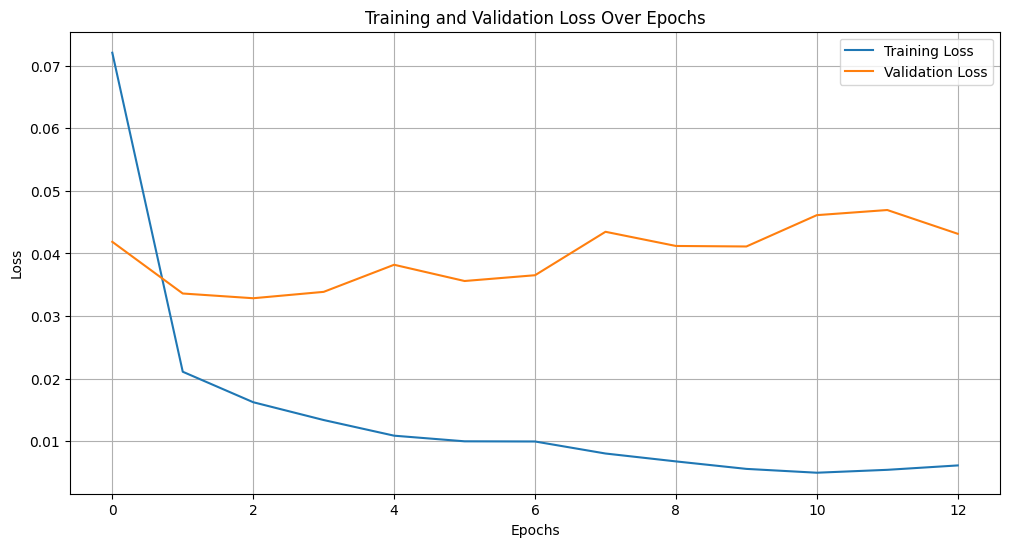

Model saved to /content/ANNmodel.h5
Training history saved to /content/ANNhistory.pkl


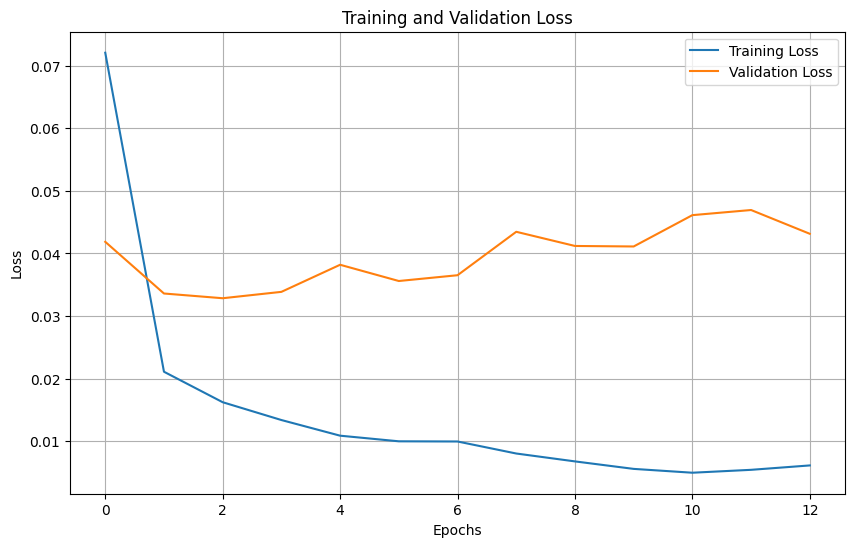


Training Metrics:
Mean: 0.0002, SD: 0.0197, MAE: 0.0014, R²: 0.9990

Test Metrics:
Mean: -0.0020, SD: 0.0697, MAE: 0.0063, R²: 0.9865

Good Generalization: The model performs well on the test set.


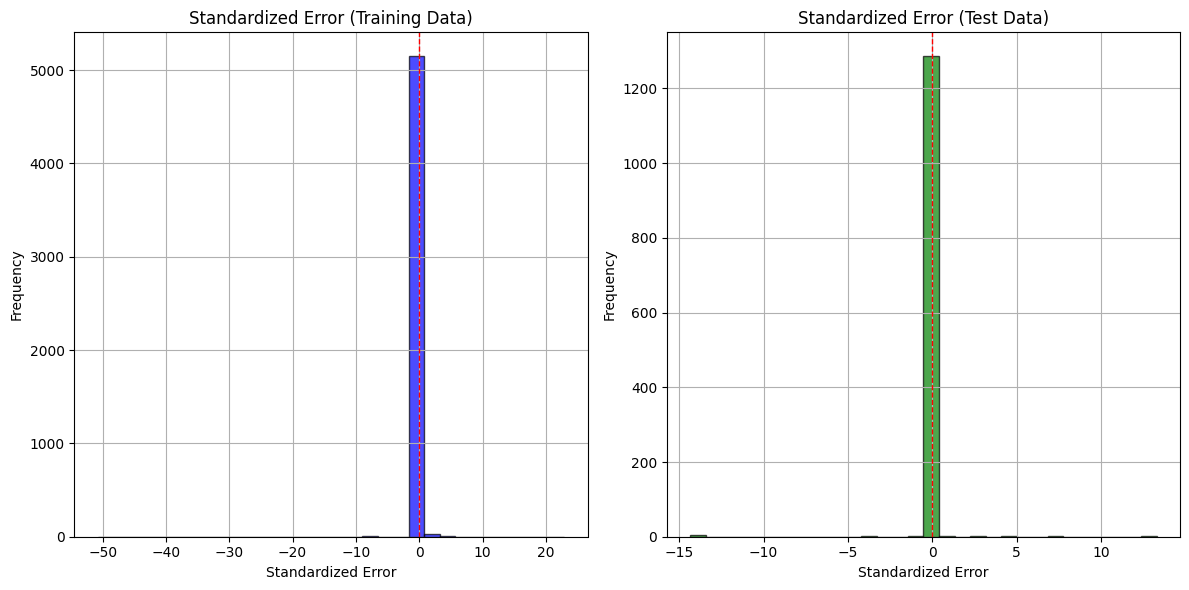

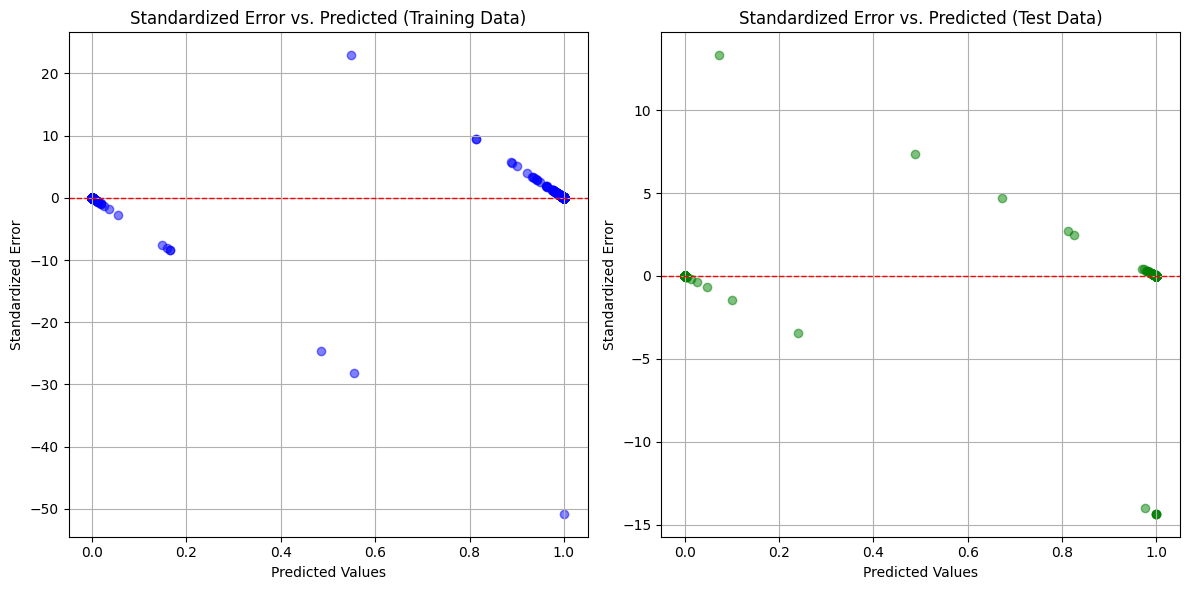

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate residuals (errors)
train_residuals = y_train - ytrain_hat
test_residuals = y_test - ytest_hat

# Standardize the residuals
train_std_error = train_residuals / np.std(train_residuals)
test_std_error = test_residuals / np.std(test_residuals)

# Plot histogram of standardized errors
plt.figure(figsize=(12, 6))

# Histogram for training data
plt.subplot(1, 2, 1)
plt.hist(train_std_error, bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.axvline(0, color='red', linestyle='dashed', linewidth=1)  # Zero reference line
plt.title('Standardized Error (Training Data)')
plt.xlabel('Standardized Error')
plt.ylabel('Frequency')
plt.grid(True)

# Histogram for test data
plt.subplot(1, 2, 2)
plt.hist(test_std_error, bins=30, color='green', alpha=0.7, edgecolor='black')
plt.axvline(0, color='red', linestyle='dashed', linewidth=1)  # Zero reference line
plt.title('Standardized Error (Test Data)')
plt.xlabel('Standardized Error')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

# Scatter plot of standardized error vs. predictions (optional)
plt.figure(figsize=(12, 6))

# Scatter plot for training data
plt.subplot(1, 2, 1)
plt.scatter(ytrain_hat, train_std_error, alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='dashed', linewidth=1)  # Zero reference line
plt.title('Standardized Error vs. Predicted (Training Data)')
plt.xlabel('Predicted Values')
plt.ylabel('Standardized Error')
plt.grid(True)

# Scatter plot for test data
plt.subplot(1, 2, 2)
plt.scatter(ytest_hat, test_std_error, alpha=0.5, color='green')
plt.axhline(0, color='red', linestyle='dashed', linewidth=1)  # Zero reference line
plt.title('Standardized Error vs. Predicted (Test Data)')
plt.xlabel('Predicted Values')
plt.ylabel('Standardized Error')
plt.grid(True)

plt.tight_layout()
plt.show()


Model saved to /content/ANNmodel.h5


Model loaded successfully!


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted value: 0.9806
Predicted class: 1
